In [107]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [143]:
!python viewing_angle.py Sphere_V598_T2E7_out.dat 60 > ../data/Sphere_V598_T2E7_60.dat

In [144]:
dataV598 = np.loadtxt("../data/Sphere_V598_T2E7_60.dat")
tol = np.loadtxt("tol.txt")

In [145]:
voff = 39.2342980263
binT = tol[1,0]-tol[0,0]
binC = 12.85*(dataV598[1,1] - dataV598[0,1])

Norm = binT / binC
print Norm

0.905555717488


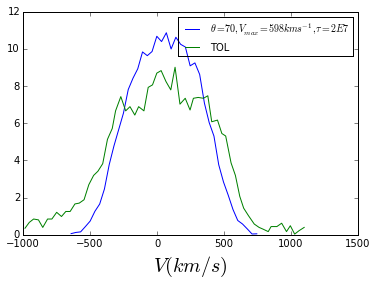

In [146]:
plot(-dataV598[:,1]*12.85 + voff, dataV598[:,0]*sum(tol[:,1])*Norm/sum(dataV598[:,0]),label=r"$\theta = 70, V_{max}=598kms^{-1}, \tau=2E7$")
plot(tol[:,0], tol[:,1], label="TOL")
legend(fontsize=10)
xlabel(r"$V(km/s)$", fontsize=20)
#savefig("CLARA-TOL0.png")

In [122]:
!python viewing_angle.py Sphere_V600_T1E7_out.dat 44.7 > ../data/Sphere_V600_T1E7_44.dat

In [123]:
dataV600 = np.loadtxt("../data/Sphere_V600_T1E7_44.dat")

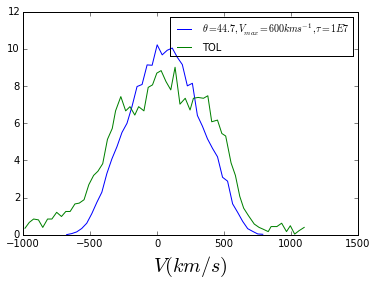

In [125]:
plot(-dataV600[:,1]*12.85 + voff, dataV600[:,0]*sum(tol[:,1])*Norm/sum(dataV600[:,0]),label=r"$\theta = 44.7, V_{max}=600kms^{-1}, \tau=1E7$")
plot(tol[:,0], tol[:,1], label="TOL")
xlabel(r"$V(km/s)$", fontsize=20)
legend(fontsize=10)
savefig("CLARA2-TOL.png")

In [127]:
!python viewing_angle.py Sphere_V625_T2E7_out.dat 44.7 > ../data/Sphere_V625_T2E7_44.dat

In [128]:
dataV625 = np.loadtxt("../data/Sphere_V625_T2E7_44.dat")

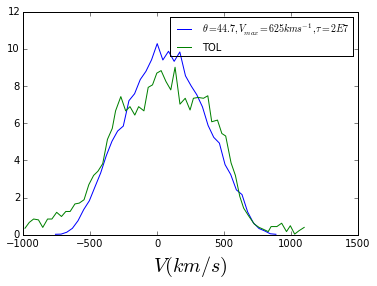

In [129]:
plot(-dataV625[:,1]*12.85 + voff, dataV625[:,0]*sum(tol[:,1])*Norm/sum(dataV625[:,0]),label=r"$\theta = 44.7, V_{max}=625kms^{-1}, \tau=2E7$")
plot(tol[:,0], tol[:,1], label="TOL")
xlabel(r"$V(km/s)$", fontsize=20)
legend(fontsize=10)
savefig("CLARA3-TOL.png")